# Introduction to Deep Learning Course

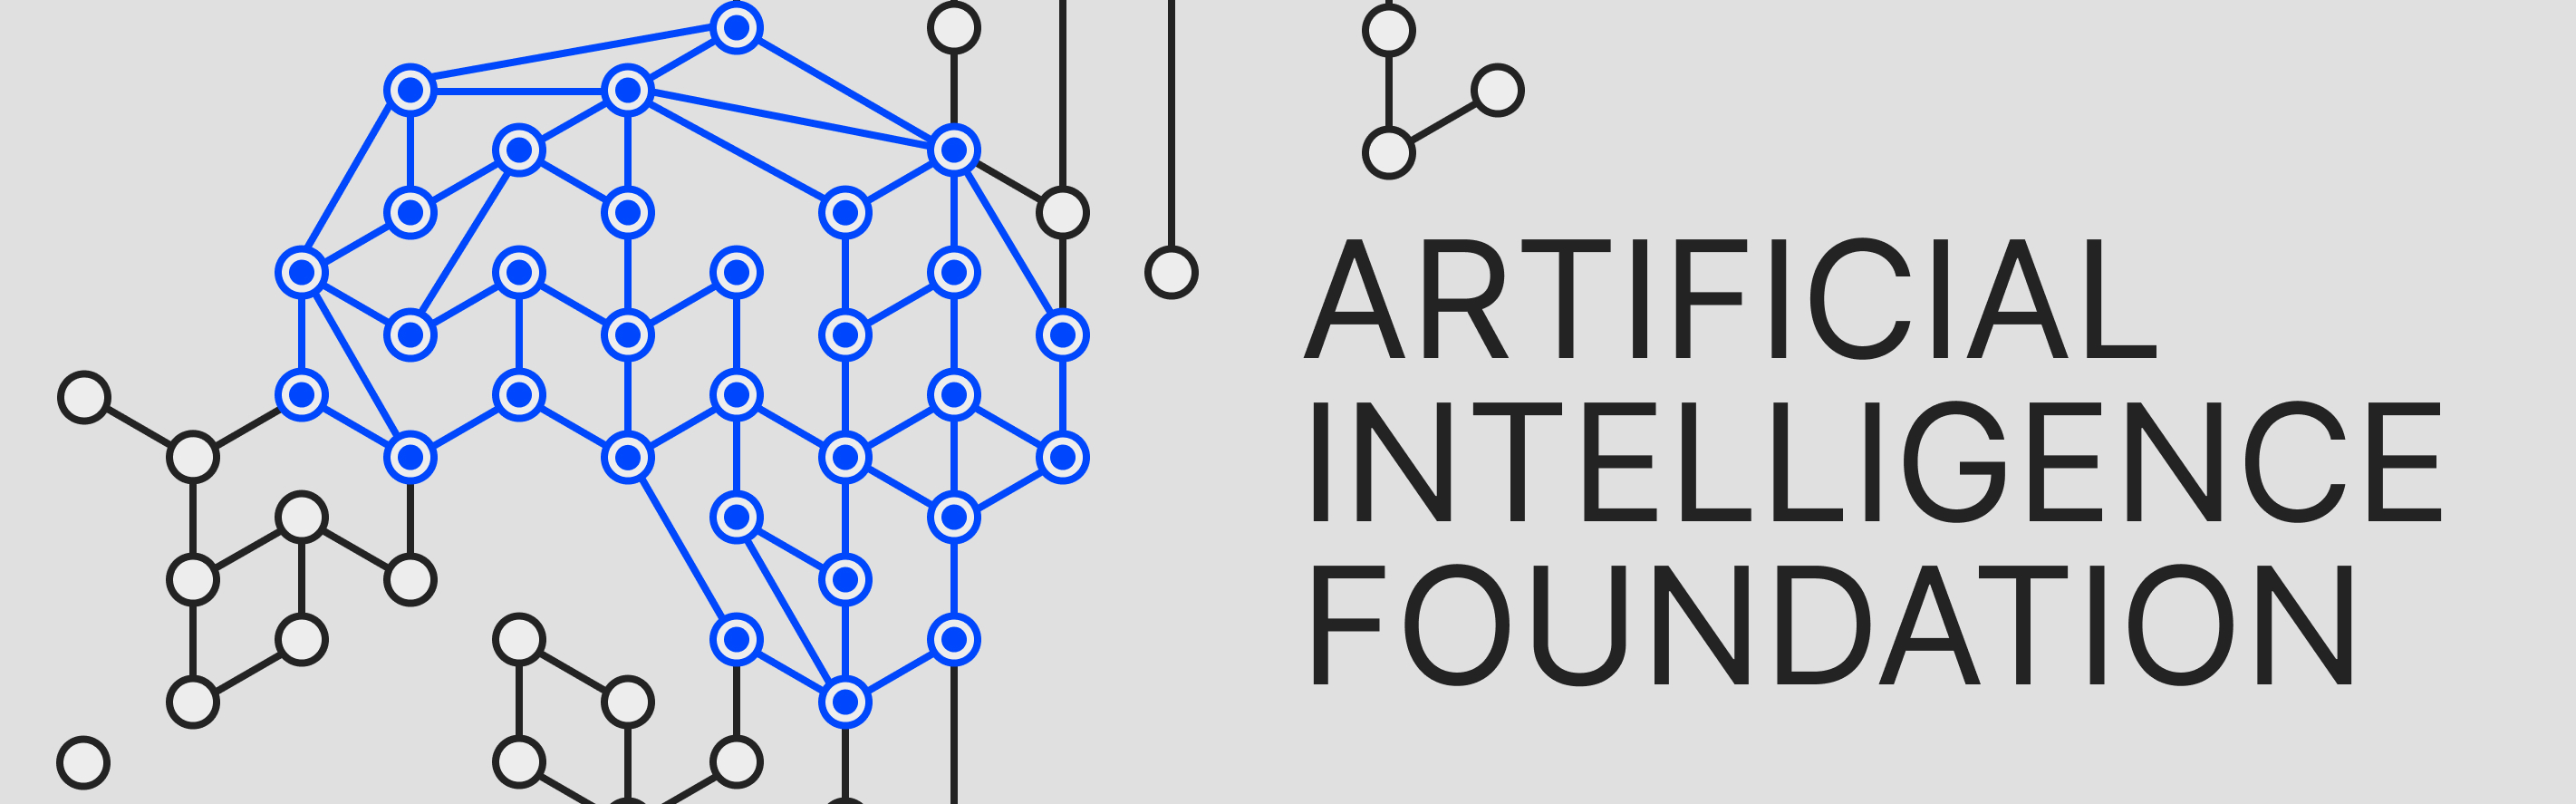

## Lesson #1. Intro to Neural Networks.

##### Author: [Tatiana Gaintseva](https://atmyre.github.io)

This is the first lesson in the "Introduction to Deep Learning" course. In this lesson we will get acquainted with the structure of an artificial neural network and the principle of its training.



There are two main ways of getting to the structure of neural network, namely:
- Consider an artificial neuron as a model of a biological neuron. This analogy is not very strict in the sense that although an artificial neuron is ideologically similar to a biological one, it does not model it completely. Moreover, the structure of an artificial neural network has several features that greatly distinguish it from a biological neural network;
- The second option is mathematical, more rigorous. Here, the neuron and the entire neural network are considered as a generalization of the logistic regression model. And with this approach, it becomes clear why the neural network is designed the way it is.

In this lesson we will mainly go for the second option. Hovewer, in the additional materials on the bottom of this notebook you can find information on the analogy between biological and artificial neurons


Here's the **outline of this class**:

- [Logistic Regression: Reminder](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=F5UfeWQ_YFOu)
    - [How Logistic Regression works](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=VlrPV7G8u1ly)
    - [Geometric meaning of Logistic Regression](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=ZRtcK_x3u8pH)
    - [Logistic Regression on XOR problem](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=I2XvLS58aVVc)
    
- [From Logistic Regression to Fully-Connected Neural Network](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=aWr06XCxTBOZ)
    - [Designing intermediate features for Logistic Regression](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=I00iGy0iaTWm)
    - [Fully-Connected Neural Network](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=feAuc7U_riOF)
    - [Activation Functions](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=qWyyYoq8SyvL)
    - [Solving XOR problem using Fully-Connected Neural Network](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=lAAbhshY1nfn)
    - [Solving Regression task using Fully-Connected Neural Network](https://colab.research.google.com/drive/1-8ZySrRGnHvAvxp4-nDZBUims3p9gCPA#scrollTo=G1Fn9WeT60Qc)

Now, let's begin our adventure towards artificial neural network with a reminder of Logistic Regression model.

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression: Reminder



### How Logistic Regression works

Logistic regression is a model for solving a binary classification problem. Let's remind ourselves of its principle.

Consider a dataset for binary classification task, where each element is represented by $k$ features. The dataset may look as follows (Y denotes target variable):

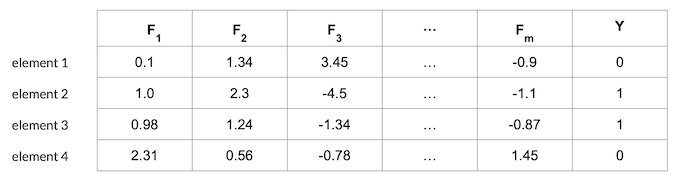

Logistic regression works by assigning a coefficient to each feature of the data. Let us denote by $k_i$ the coefficient corresponding to the feature $F_i$ of the dataset. Plus, there is one more additional coefficient $k_0$, which does not correspond to any of the characteristics. It is called *bias* or *intercept*.

Consider an input element $X = (x_1, x_2, x_3, ..., x_k)$, where $x_i$ is a value of feature $F_i$ for this element. Logistic regression calculates the prediction to $X$ using the formula:

$$\widehat{y} = \sigma \left( \sum k_i x_i + k_0 \right)$$

Here $\sigma$ is a sigmoid activation function:

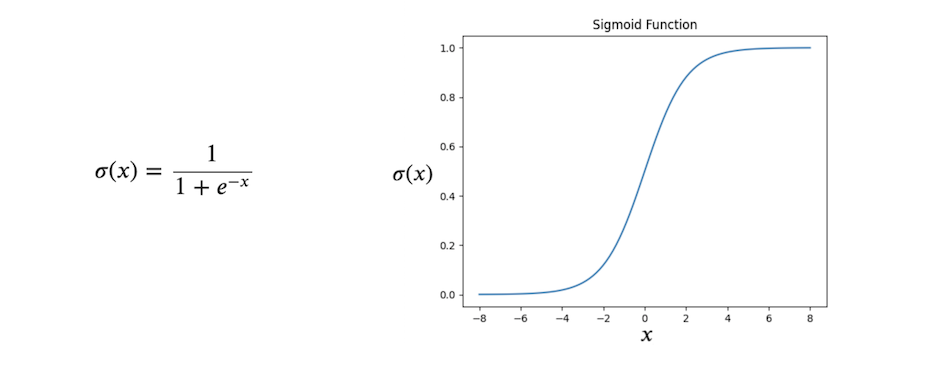

The output of sigmoid function is bounded by [0, 1]. This formula gives a prediction for element $X$ in the form of the probability that the incoming element belongs to class 1.

Training of the Logistic Regression models consists of finding optimal values ​​of all the parameters $k_i$.

Logistic Regression can be depicted as follows:

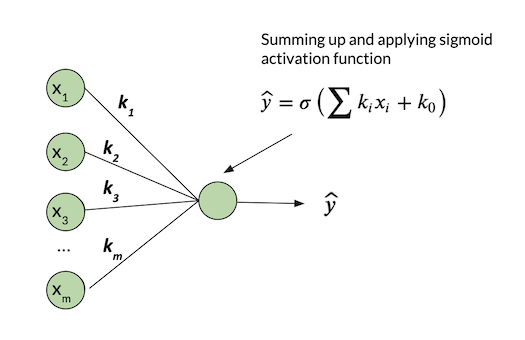

Let us now generate some sample 2-dimentional data to visualize the work of logistic regression. We'll generate two groups of points grouped into two distinct clusters.

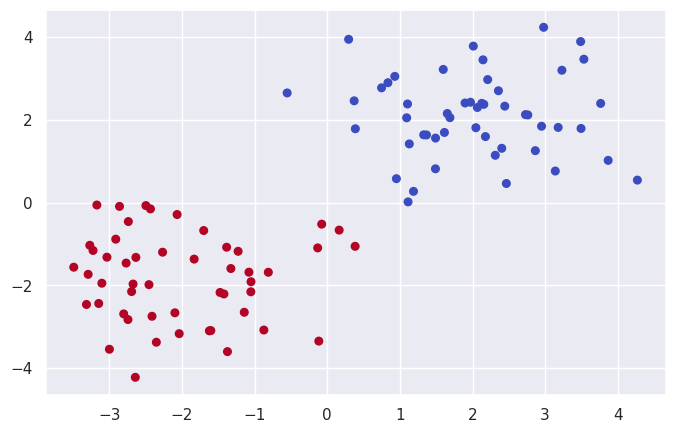

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
rng = np.random.RandomState(0)

# define synthetic points grouped in two clusters
X1 = rng.randn(50, 2) + np.array([2,2])
X2 = rng.randn(50, 2) + np.array([-2,-2])
X = np.concatenate([X1, X2])
Y = [0]*len(X1)+[1]*len(X2)

# visualize the points. Colours correspond to the class (red — 1, blue — 0)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.coolwarm);

Let's now train logistic regression model on this data.

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, Y)

LogisticRegression()

We can now print the values of coefficients which logistic regression model has assigned to all the features:

In [4]:
print('k_i coefficients:', lr.coef_)
print('k_0 coefficient:', lr.intercept_)

k_i coefficients: [[-1.39036594 -1.57344364]]
k_0 coefficient: [0.41144395]


Let's also visualize the decision bounday of the trained LogReg model, i.e. the probability of each point on a plane belonging to class "1" according to the prediction of LogReg model. We'll just sample many points on a plane, get our model's prediction for them and visualize them:

In [5]:
def plot_boundary(clf, X, Y):
    """
    This function plots the decision boundary of a model clf
    params:
    clf: classifier, which decision bounday we need to plot
    X, y: features and labels of data points which will be visualized
          along with the decision boundary

    """

    # define a mesh
    x_mesh, y_mesh = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
    # get clf predictions of mesh points
    Z = clf.predict_proba(np.vstack((x_mesh.ravel(), y_mesh.ravel())).T)[:, 1]
    Z = Z.reshape(x_mesh.shape)

    b1 = x_mesh.min()
    b2 = x_mesh.max()
    b3 = y_mesh.min()
    b4 = y_mesh.max()

    # visualize mesh and colour its points in accordance with Z (clf predictions)
    image = plt.imshow(Z, interpolation='nearest', extent=(b1, b2, b3, b4), aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(x_mesh, y_mesh, Z, levels=[0], linewidths=2, linetypes='--');
    # visualize data points
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.coolwarm)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-6, 6, -6, 6])
    plt.colorbar(image)

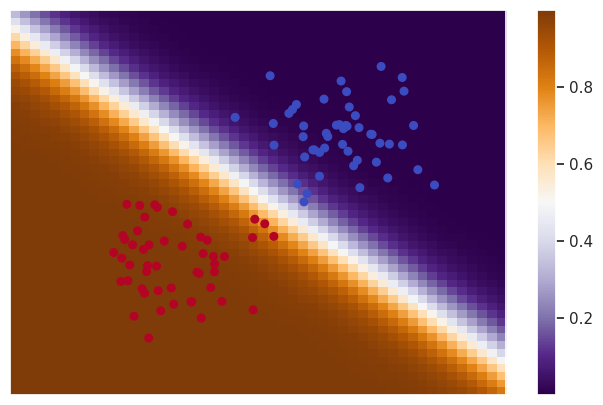

In [17]:
plt.figure(figsize=(8, 5))
# plot a decision boundary of our lr model
plot_boundary(lr, X, Y)

### Geometric meaning of Logistic Regression

Let us now remind ourselves about the geometric meaning of logistic regression and of that logistic regression is a quite weak algorithm. So once again, look at the decision rule of the logistic regression:

$$\widehat{y} = \sigma \left(\sum k_i x_i + k_0 \right)$$

The part of the formula inside the sigmoid function from a geometric point of view reflects a **linear hyperplane**.

For example, in the case when there are only two features in the dataset, the formula inside the sigmoid function defines a simple straight line on a 2-dimentional plane. In other words, if there are only two features in our dataset, our elements can be viewed as 2-dimentional points, and our logistic regression is trying to fit a straight line on a plane to divide these points into two classes. Fitting a line means that during training, logregression selects coefficients k such that the hyperplane best separates the points of two classes. We can even see on our decision boundary visualization above, that the boundary between two classes has a form of a straight line.

If our data has 3 features, our elements can be viewed as 3-dimentional points in 3-dimentional space, and the part of the formula inside the sigmoid function reflects a 2-dimentional plane, which logistic regression fits to divide these 3-dimentional points into two classes.

And, in general, if our data has $m$ features, our elements can be viewed as $m$-dimentional points in $m$-dimentional space, and the part of the formula inside the sigmoid function reflects a $m-1$-dimentional hyperplane, which logistic regression fits to divide these $m$-dimentional points into $m$ classes.



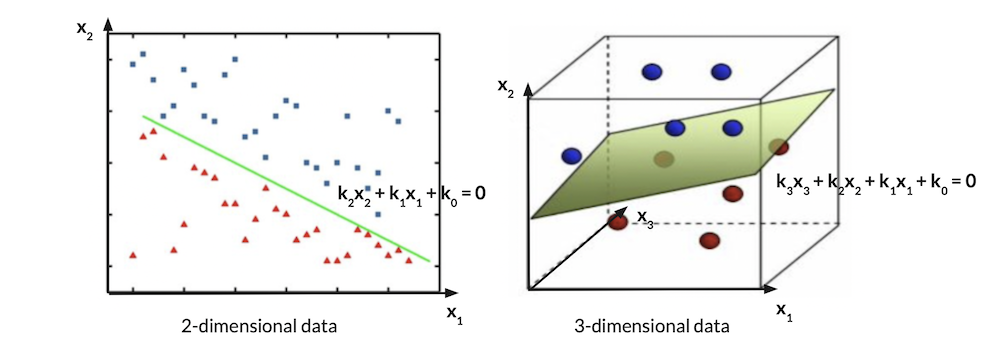

Let's manually visualize a decision boundary of our trained logistic regression model by plotting the linear hyperplane that our Logistic Regression reflects (in our case that'll be a simple line on a plane). First, look again at coefficients that our model has learned:

In [7]:
print('k_i coefficients:', lr.coef_)
print('k_0 coefficient:', lr.intercept_)

k_i coefficients: [[-1.39036594 -1.57344364]]
k_0 coefficient: [0.41144395]


Now we can define a function of a line that logreg has fit.

The formula of the line is:

$$k_2x_2 + k_1x_1 +k_0 = 0$$

Then:

$$x_2 = \frac{k_1x_1 +k_0}{k_2}$$

And we can define the function as follows:

In [8]:
logreg_plane = lambda x, lr: (lr.coef_[0][0]*x + lr.intercept_) / (-lr.coef_[0][1])

(-6.0, 6.0)

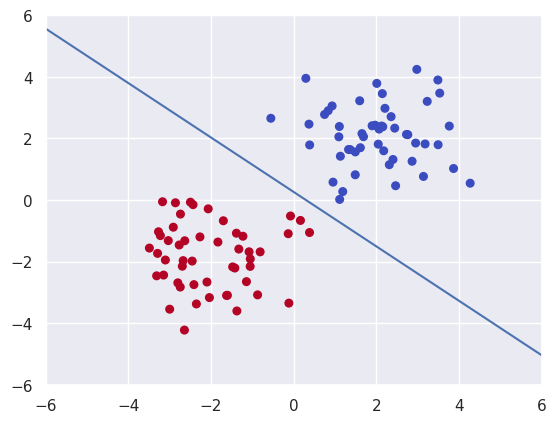

In [18]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.coolwarm)
x = np.linspace(-6, 6, 1000)
y = logreg_plane(x, lr)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-6, 6)

We see that it agrees with the decision boundary visualization that we've done above based on LogReg predictions.

The fact that the decision rule of Logistic Regression is linear prevents it from working well on data where the points are not linearly separable. For example, suppose that the elements in our dataset are two-dimentional and are arranged like this:


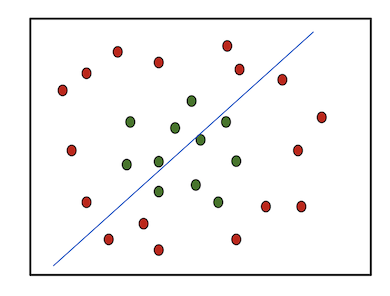

Whatever line you build here, it will not separate points of different classes well. In this case, the data is said to be **linearly inseparable**

In the case of such data, we would like our model to be more “flexible”, so that its decision rule is more complex than linear.


### Logistic Regression on XOR problem


Let's try to solve the XOR problem using logistic regression. We'll see that Logistic Regression is not a good fit for that problem.

First, let's generate XOR data:

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
rng = np.random.RandomState(0)

# define synthetic points grouped in four clusters
X1 = rng.randn(50, 2) + np.array([3,3])
X2 = rng.randn(50, 2) + np.array([-3,3])
X3 = rng.randn(50, 2) + np.array([3,-3])
X4 = rng.randn(50, 2) + np.array([-3,-3])
X_xor = np.concatenate([X1,X2,X3,X4])
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

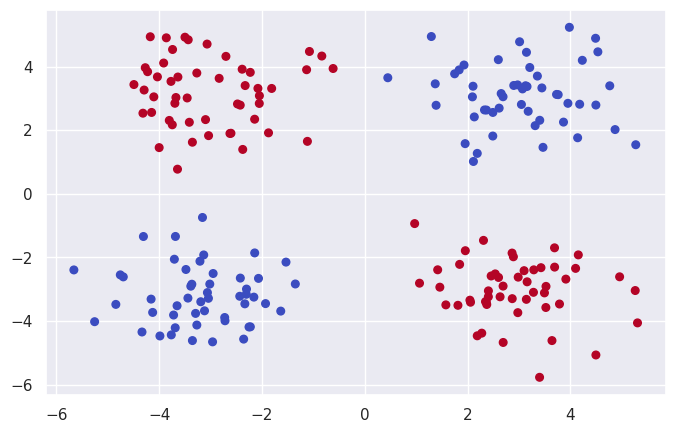

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(X_xor[:, 0], X_xor[:, 1], s=30, c=Y_xor, cmap=plt.cm.coolwarm);

Now let us train Logistic Regression model on this data and visualize the decision bounday of the trained LogReg model:

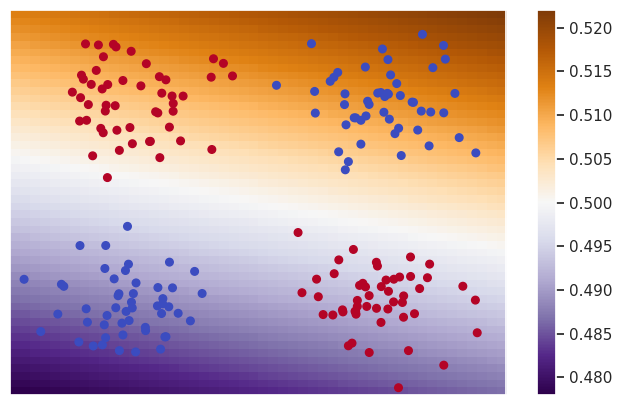

In [12]:
lr_xor = LogisticRegression()
lr_xor.fit(X_xor, Y_xor)
plt.figure(figsize=(8, 5))
plot_boundary(lr_xor, X_xor, Y_xor)

## From Logistic Regression to Fully-Connected Neural Network

### Designing Intermediate Features for Logistic Regression

Let's now think about how we could approach solving the above problem, i.e. .;;**how we could make the log regression algorithm be more flexible and able to adapt to more complex than linear dependencies in the data**.

Now our pipeline for getting the prediction to an incoming element is designed as follows: we feed the features of element to our model and get a prediction using a LogReg formula:


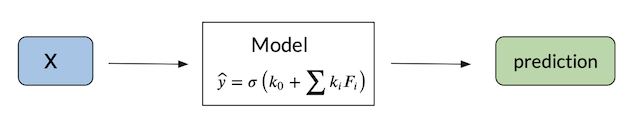

Let's do the following: before feeding the element features as input to the model, we'll try to modify these features in a way so that they become linearly separable. Say, we'll run them through some function, which will change the features in such way, so that the elements of the dataset represented by new features become separable by a linear hyperplane (that is, using log regression).


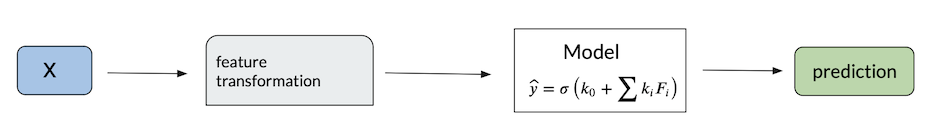

It turns out that for some types of features, there are well-known functions which can transform these features to make them become linearly separable. Such functions are called **kernels**, and using kernels to transform features is called [kernel trick](https://en.wikipedia.org/wiki/Kernel_method). Most often, kernels translate features into a higher-dimensional space. This means, that they increase the number of features in the dataset. For example, the kernel illustrated below projects elements from 2-D space into 3-D space. This makes initially non-linearly separable elements become separable in a new 3-D space by a 2-D plane.




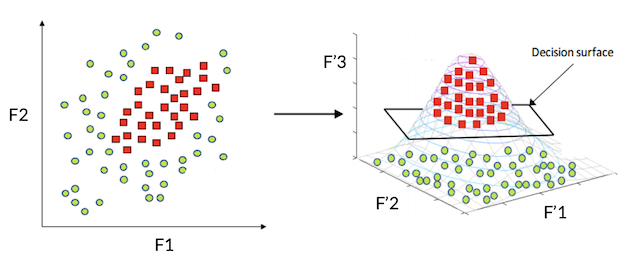

However, **kernels are fixed functions**. They work well in some cases and badly in others. But it is impossible to find some fixed “universal” kernel that would always make dataset elements linearly separable. Therefore, we would like to come up with some more flexible and universal way to transform features so that it could make elements linearly separable regardless of the dataset.

**What if we make feature transformation trainable too?** We can build some new machine learning models, the purpose of which would be to take the features of an element as input and output a set of new features for this element. And we'll train these models to output such features for elements, so that logistic regression will be able to work well on this new set of features. That is, these will be such **trainable kernels**.

Let's do that. And let's also choose logistic regressions for these trainable kernels models. Let's assume we have 3 features in our input data, and we'll have 4 Logistic Regression models to help us transform these features into new, better suited ones.


Given input element $X = (X^1, X^2, X^3)$, the first of four Logistic Regression models will transform them into a new feature $S^1_1$. Let's define weights of our Logistic Regression as $w_{1}^{i1}$ and bias term as $b^1_1$.

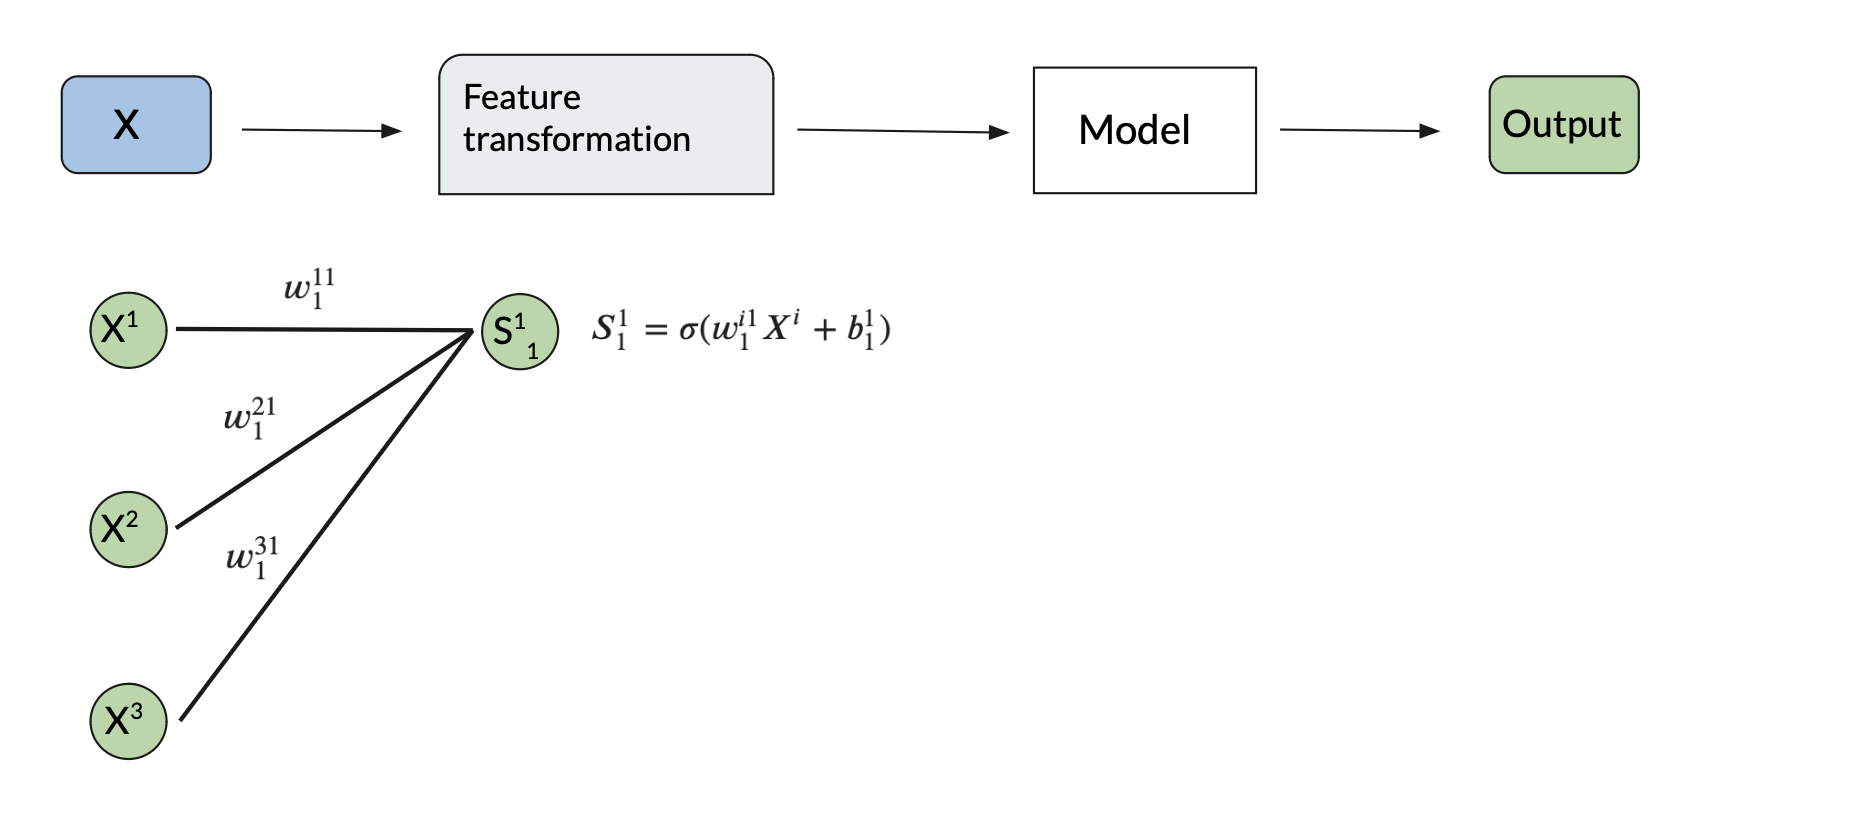

The second Logistic Regression with weights $w_1^{i2}$ and bias $b_1^2$ will transform the input features into a new feature $S^2_1$:

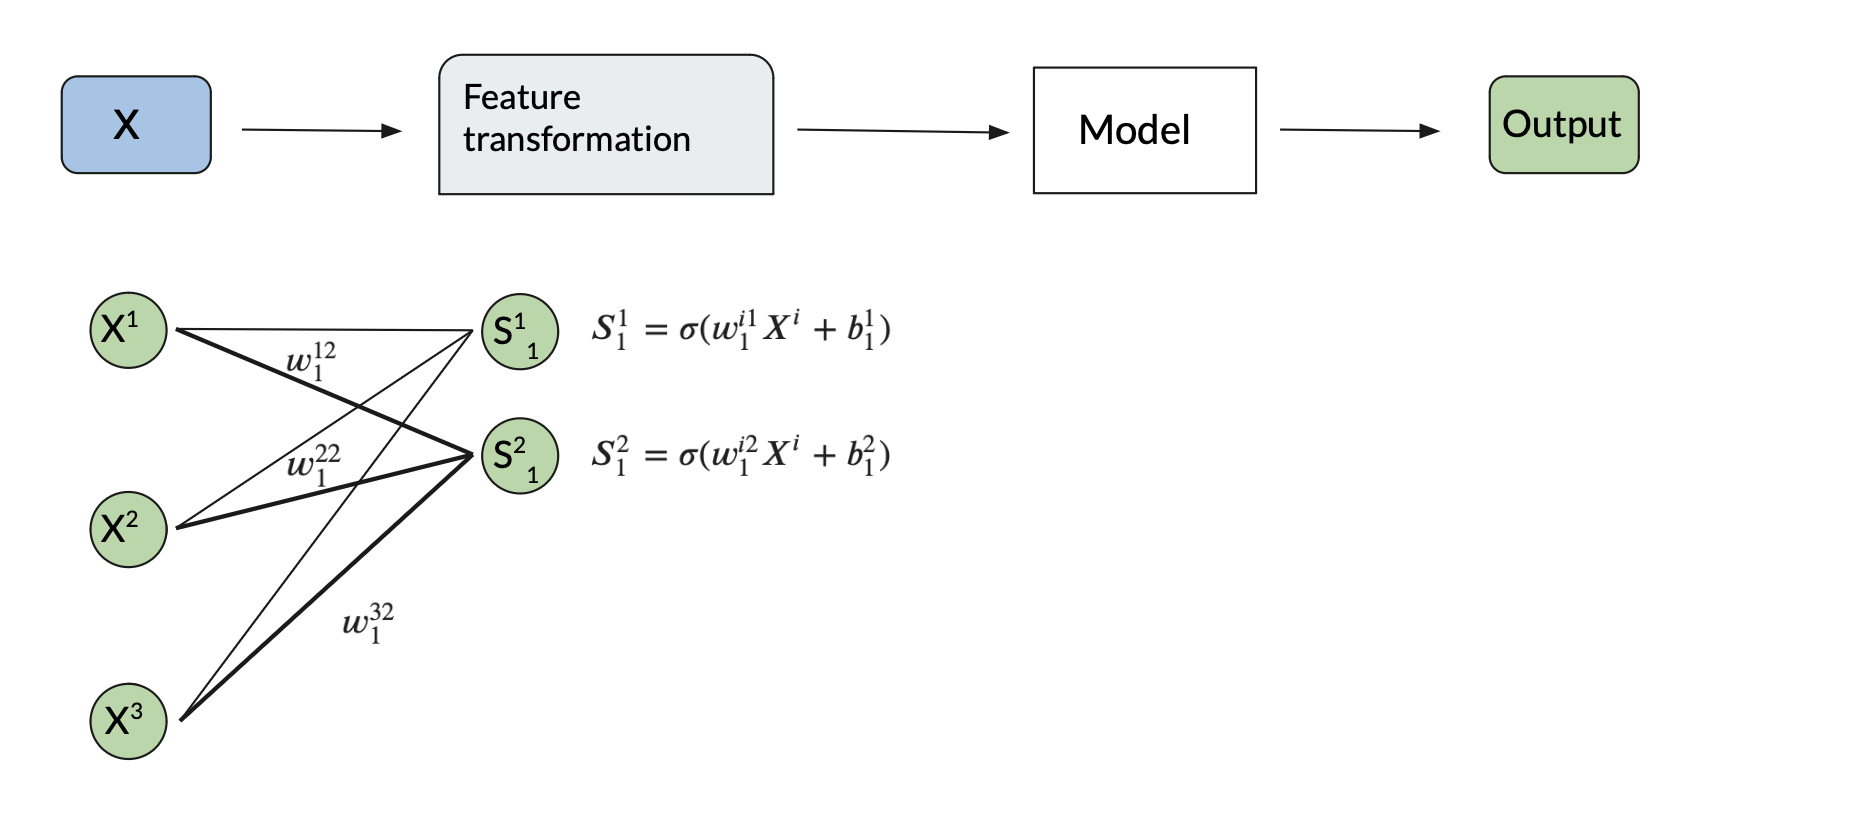

And the $3^{rd}$ and $4^{th}$ LogReg models will transform the input features into new features $S^3_1$ and $S^4_1$, resulting in the following structure:

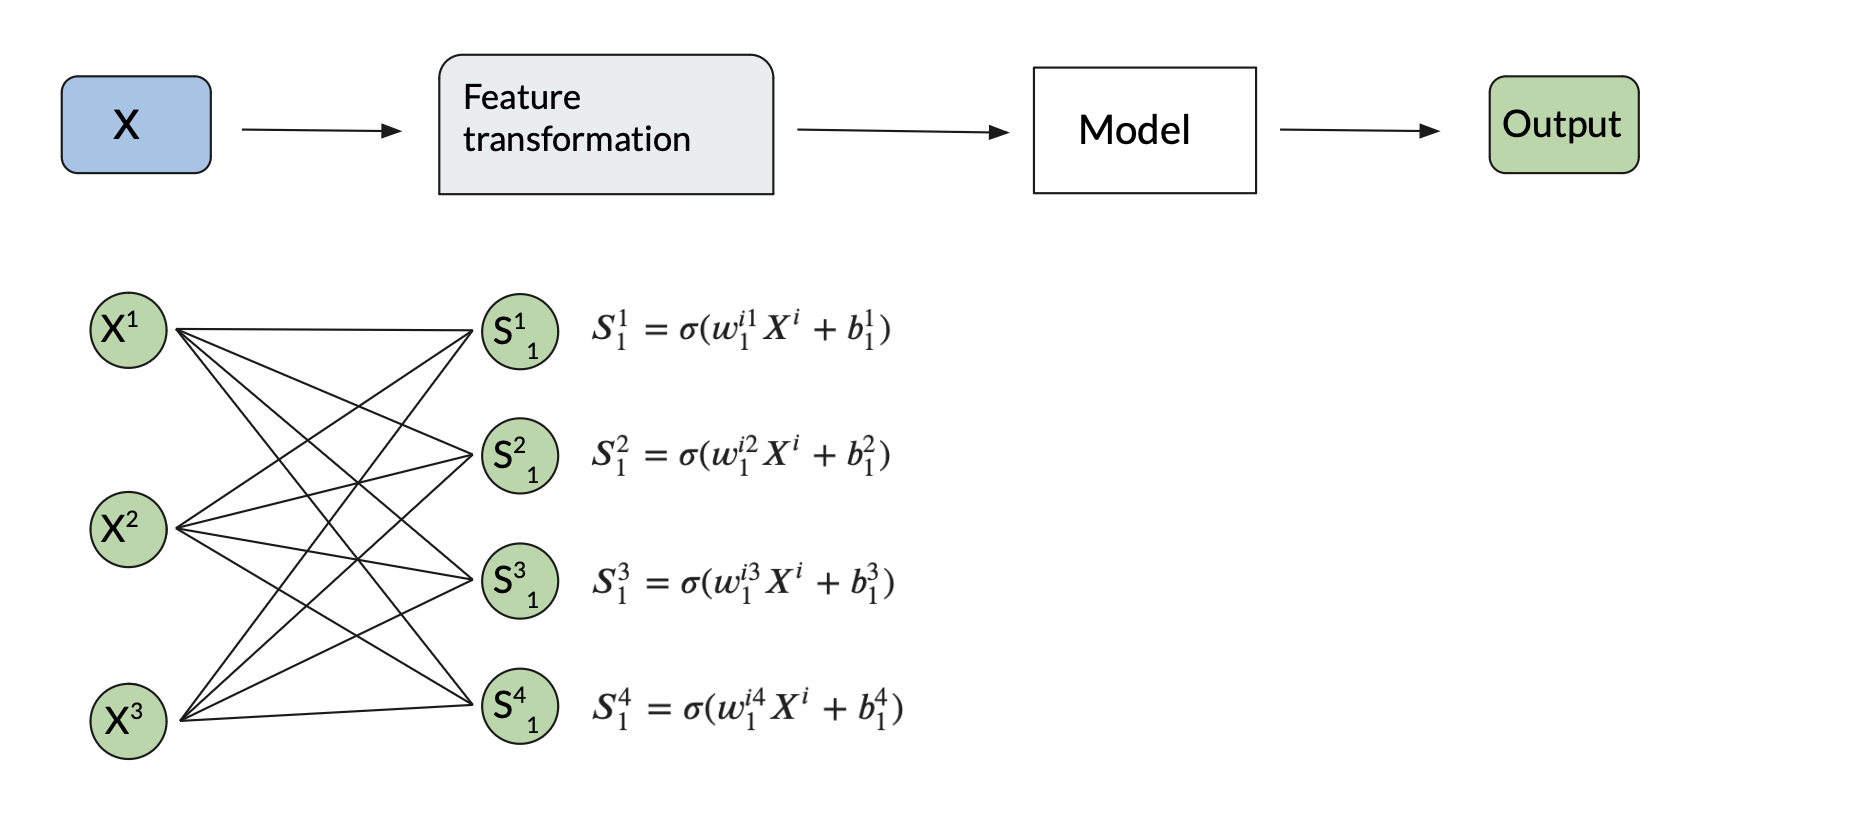

Let's now express input features, LogReg models' parameters and outputs in a form of vectors and matrices:

$X = \begin{pmatrix}
X^1 \\
X^2 \\
X^3
\end{pmatrix}$ $\ \ $
$W_1 = \begin{pmatrix}
w_1^{11} & w_1^{12} & w_1^{13} & w_1^{14}\\
w_1^{21} & w_1^{22} & w_1^{23} & w_1^{24}\\
w_1^{31} & w_1^{32} & w_1^{33} & w_1^{34}
\end{pmatrix}$ $\ \ $
$b_1 = \begin{pmatrix}
b^1_1 \\
b^2_1 \\
b^3_1 \\
b^4_1
\end{pmatrix}$ $\ \ $
$S_1 = \begin{pmatrix}
S^1_1 \\
S^2_1 \\
S^3_1 \\
S^4_1
\end{pmatrix}$


Then we can write a formula for obtaining new features $S_1$ based on input features $X$ in a matrix form:

$$S_1 = \sigma(W_1^{T}X + b_1)$$

Okaym and let's now build the final LogReg model, which will take $S^i_1$ as inputs and output the final prediction. We'll define weights and bias of this model as $w_2^{i1}$ and $b^1_2$:

$$\widehat{y} = \sigma \left( \sum w^{i1}_2S^i + b^1_2 \right)$$

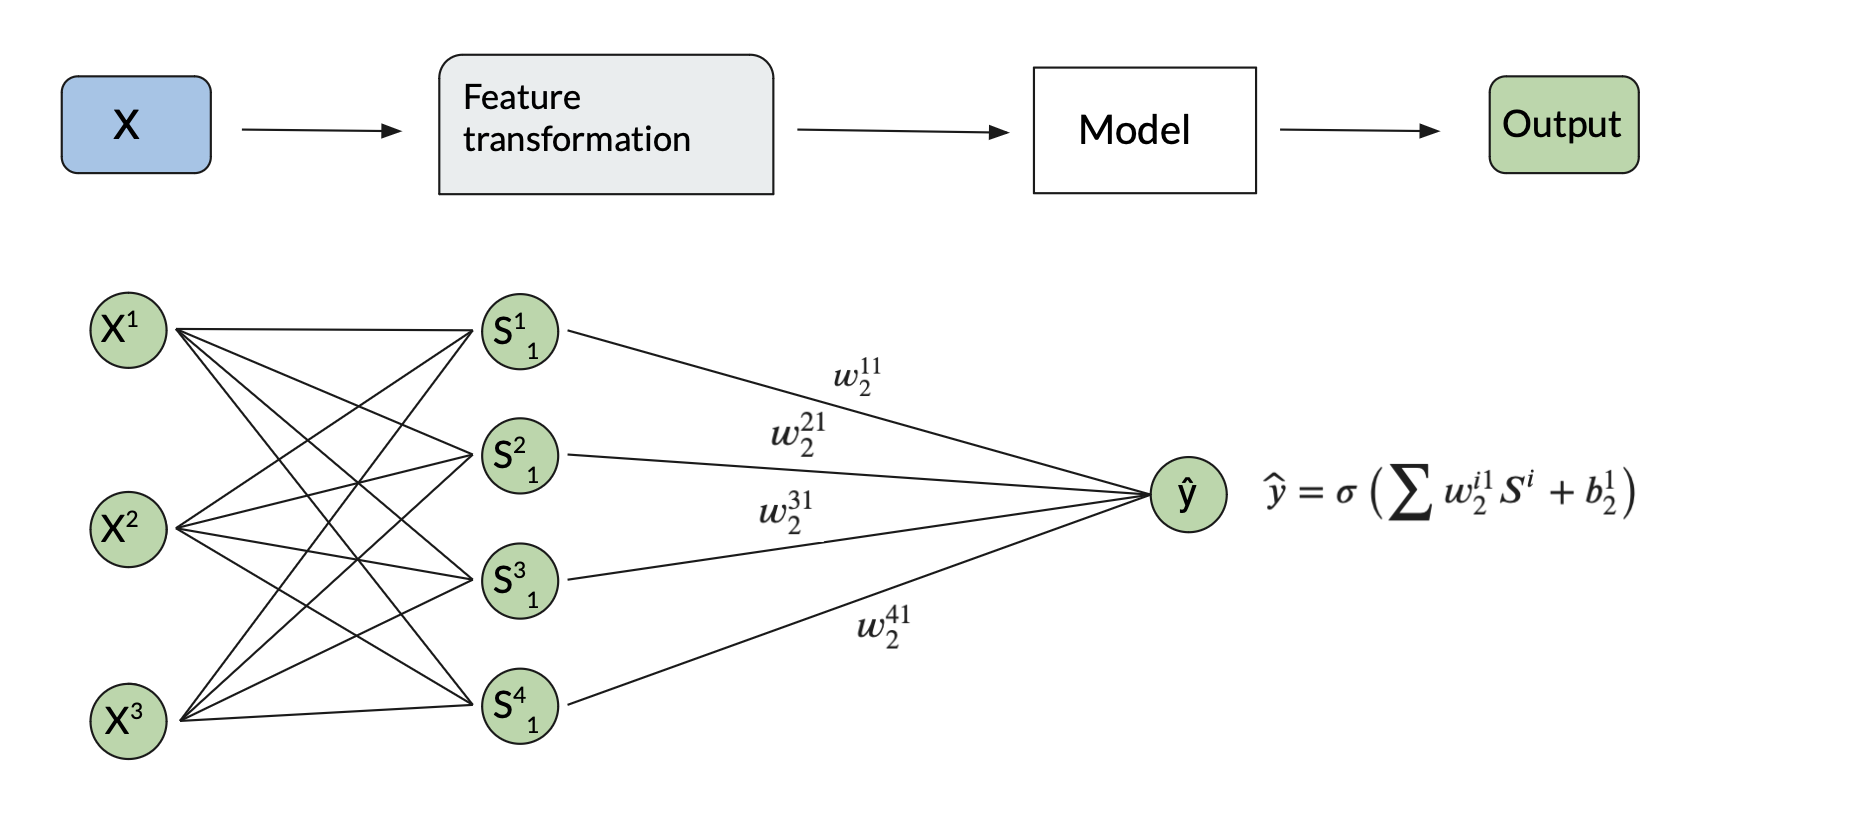

Here we can also rewrite the formula in matrix form. Define:

$W_2 = \begin{pmatrix}
w_2^{11} \\
w_2^{21} \\
w_2^{31} \\
w_2^{41}
\end{pmatrix}$ $\ \ $
$b_2 = \begin{pmatrix}
b_2^{1}
\end{pmatrix}$ $\ \ $

Then:


$$\widehat{y} = W_2^TS^1 + b_2$$

Let's now remember the formula that we got for $S$:

$$S^1 = \sigma(W_1^{T}X + b_1)$$


And we can now plug the formula for $S^1$ into the formula for $\widehat{y}$:

$$\widehat{y} = W_2^T\sigma \left(W_1^{T}X + b_1 \right) + b_2$$

That's the final formula of our model. It's trainable parameters are $W_1, W_2, b_1, b_2$.

Now note that nothing forbids us to have more than one layer of feature transformations. We can have some more Logistic Regressions on top of the previously ransformed features, like this:

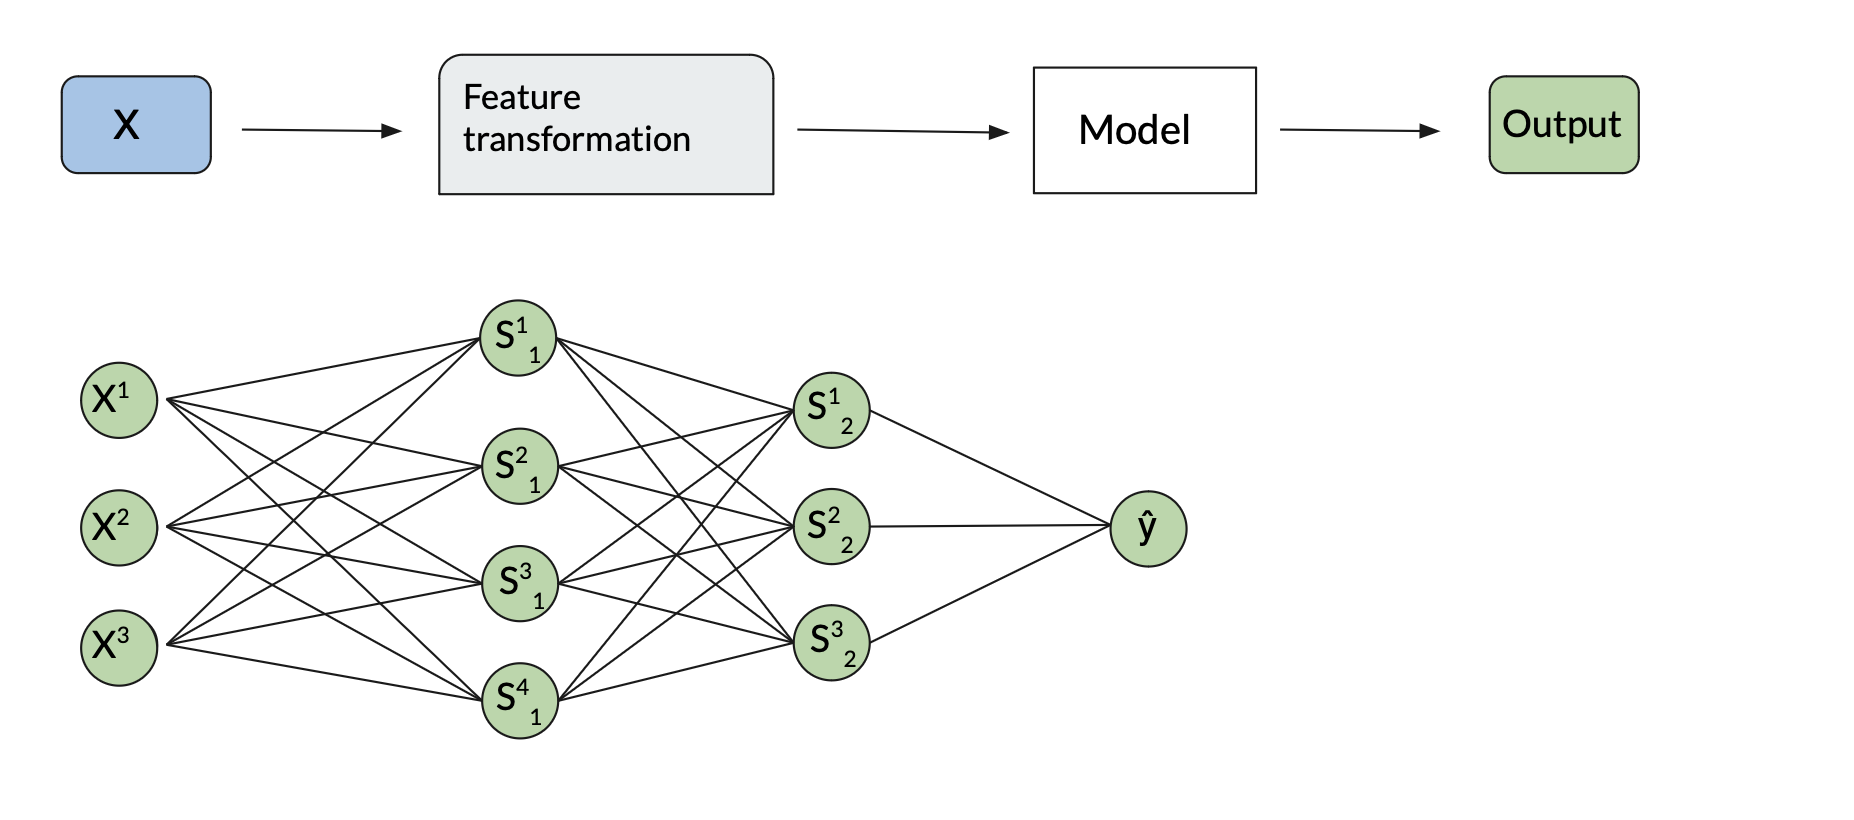

Here if we define matrices of weights and biases of first- and second-layer Logistic Regression models as $W_1, b_1$ and $W_2, b_2$, and weights and biase of the final model as $W_3, b_3$, we'll get the following formula:

$$\widehat{y} = W_3^T \sigma \left( W_2^T \sigma \left(W_1^TX + b_1 \right) + b_2\right)$$

The model became more complicated, with more adjustable parameters.

### Fuly-connected Neural Network

We finally got the following structure:

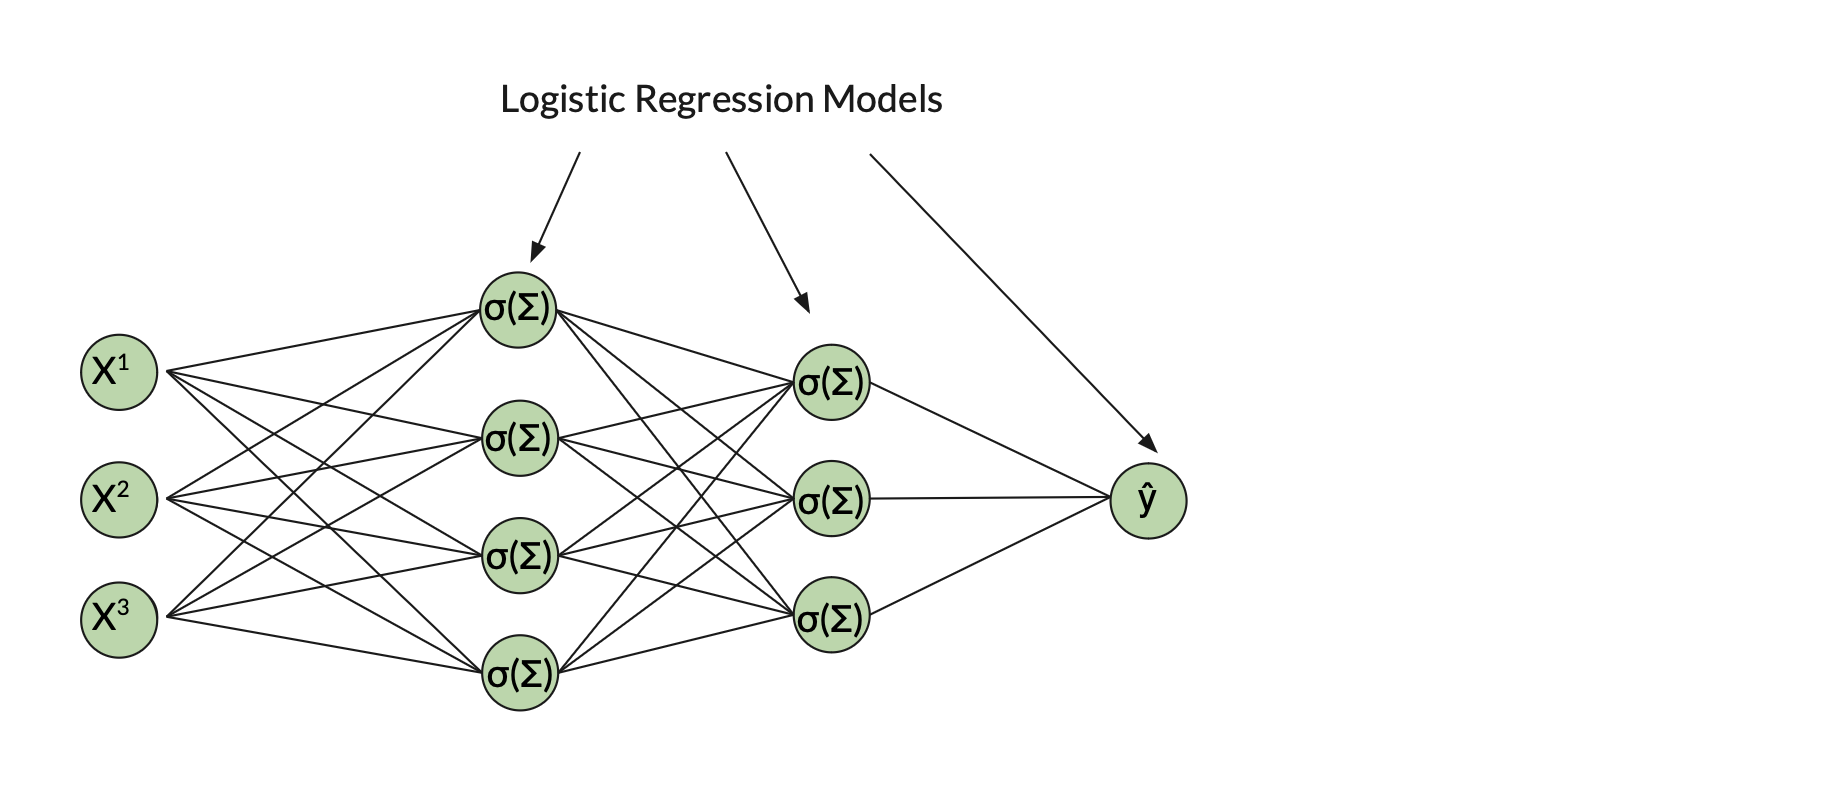

This is how we got the structure of a **fully-connected network** with an arbitrary number of layers based on the idea of improving the performance of Logistic Regression model. Each Logistic Regression model is a neuron.








The formula of a fully-connected network with $k$ layers will be the following:

$$\widehat{y} = \sigma(W_k^T \sigma(W_{k-1}^T \sigma(\dots(W_1^T X + b_1) … ) + b_{k-1}) + b_{k})$$

The process of training such a neural network for a certain task consists of finding the optimal values ​​of all parameters of all Logistic Regression models $\{W_i, b_i\}$. All Logistic Regression models are trained together. Their parameters are adjusted to each other during training so that the entire final model solves the task well.

It is also worth mentioning that often all the layers of the network up to the last layer are called a **feature extractor**, and the last layer is called a **classifier**. This is consistent with how we got a structure of the fully connected network based on Logistic Regression: the last layer of the network is, in fact, the Logistic Regression responsible for solving the given task (aka classifier), while all other layers act as feature transformators.

Also, the first layer (which simply passes features of input elements to the network) is normally called **input layer**, last layer is called **output layer**, and all the intermediate layers are called **hidden layers**.

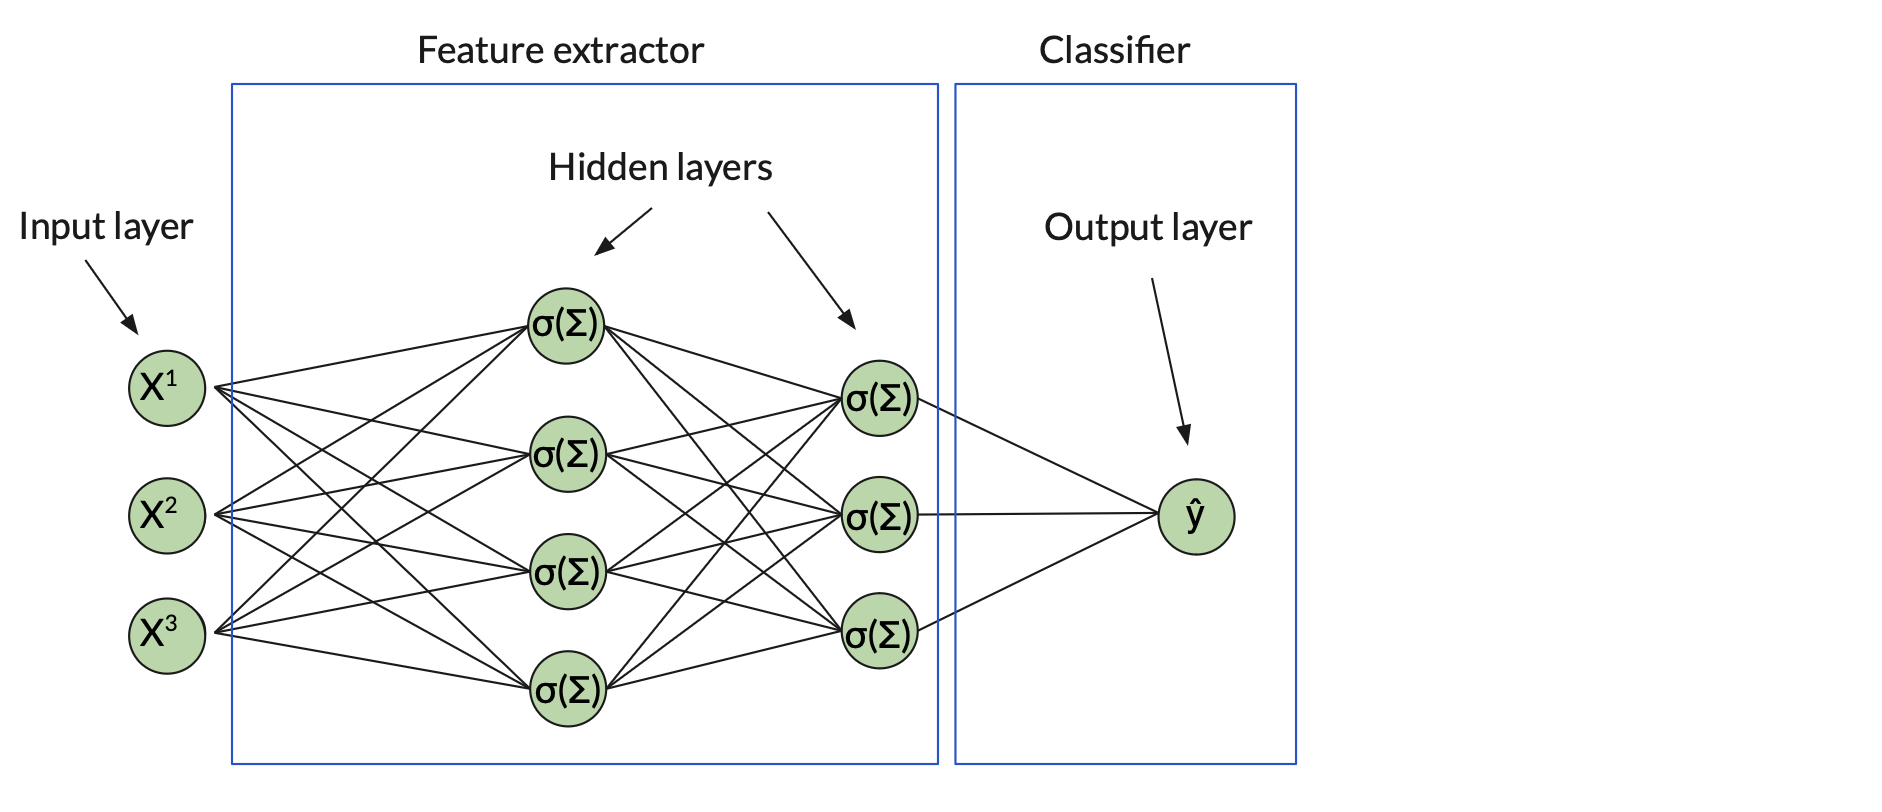

So we've created the structure of a neural network. We also need to learn how to train such a model. But before that let us talk about one more important thing: activation functions of network's layers.

### Activation functions

So our neural network consists of layers of neurons (aka Logistic Regression models). Each neuron expresses a following function:

$$\sigma \left( \sum_{i=0}^{n} X^iw^i + b \right)$$

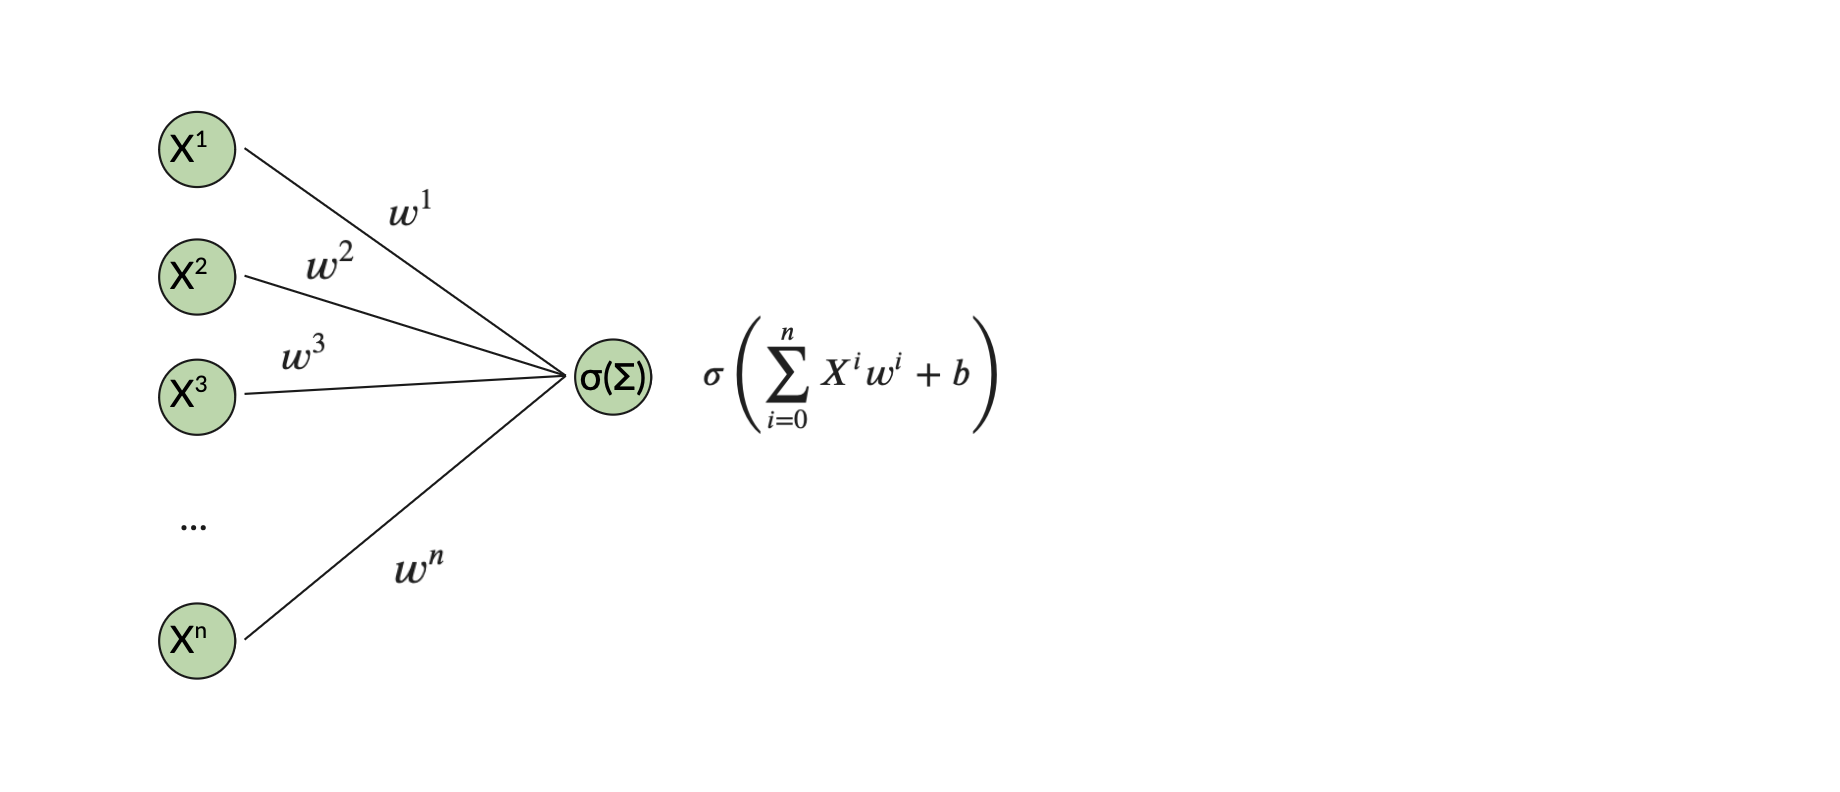

Here the function $\sigma$ is called the **activation function** of a neuron. In the neural network that we've built above $\sigma$ is a sigmoid function. This happened because we used Logistic Regression models for our neurons. But in general, in a fully connected neural network neurons can have different activation functions, not just sigmoid one. In this section, we will look at some popular activation functions used in practice.

But before that, a few notes regarding activation functions:

1. **All neurons in one layer of the network have the same activation function.** This is due to the fact that the output of the neural network is calculated in matrix form:
$$\widehat{y} = \sigma(W_k^T \sigma(W_{k-1}^T \sigma(\dots(W_1^T X + b_1) … ) + b_{k-1}) + b_{k})$$

    , and it is convenient to apply the activation function directly to the output vector of each layer, and not to each neuron separately.

2. **Each hidden layer of the neural network must have activation function** There's no use of a network layer without the activation function.

   

#### Question #1

Why do you think is that so, that each hidden layer must have an activation function?

#### Hint

Think about the nature of a function of a fully-connected layer without activation function. What type of function do two consequtive fully-connected layers without activation function between them represent?

#### Answer

 This is because the formula of a network layer inside the activation function is a linear function. And two consecutive network layers without an activation function between them form a composition of two linear functions, which is also a linear function. That is, two consecutive network layers without an activation function between them are equivalent to one network layer. In order for two consecutive network layers to express a more complex function than a linear one, there must be an activation function between them.

Because of this, fully-connected layer is often also called linear, and the activation function is also called nonlinearity: it adds a nonlinear component to the network formula.



3. If we are solving a binary classification problem, the last layer of the neural network still has to have a sigmoid activation function (since, in fact, the last layer is log regression, which is designed to solve exactly the binary classification problem). Meanwhile, in the hidden layers of the network there may be other activation functions.

Now let's look at some popular activation functions that are used in hidden layers of a fully connected neural network.

#### Sigmoid

Again, in the neural network we've built above, there were sigmoid functions as activation functions of all layers. The folrmula of sigmoid function is the following:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$




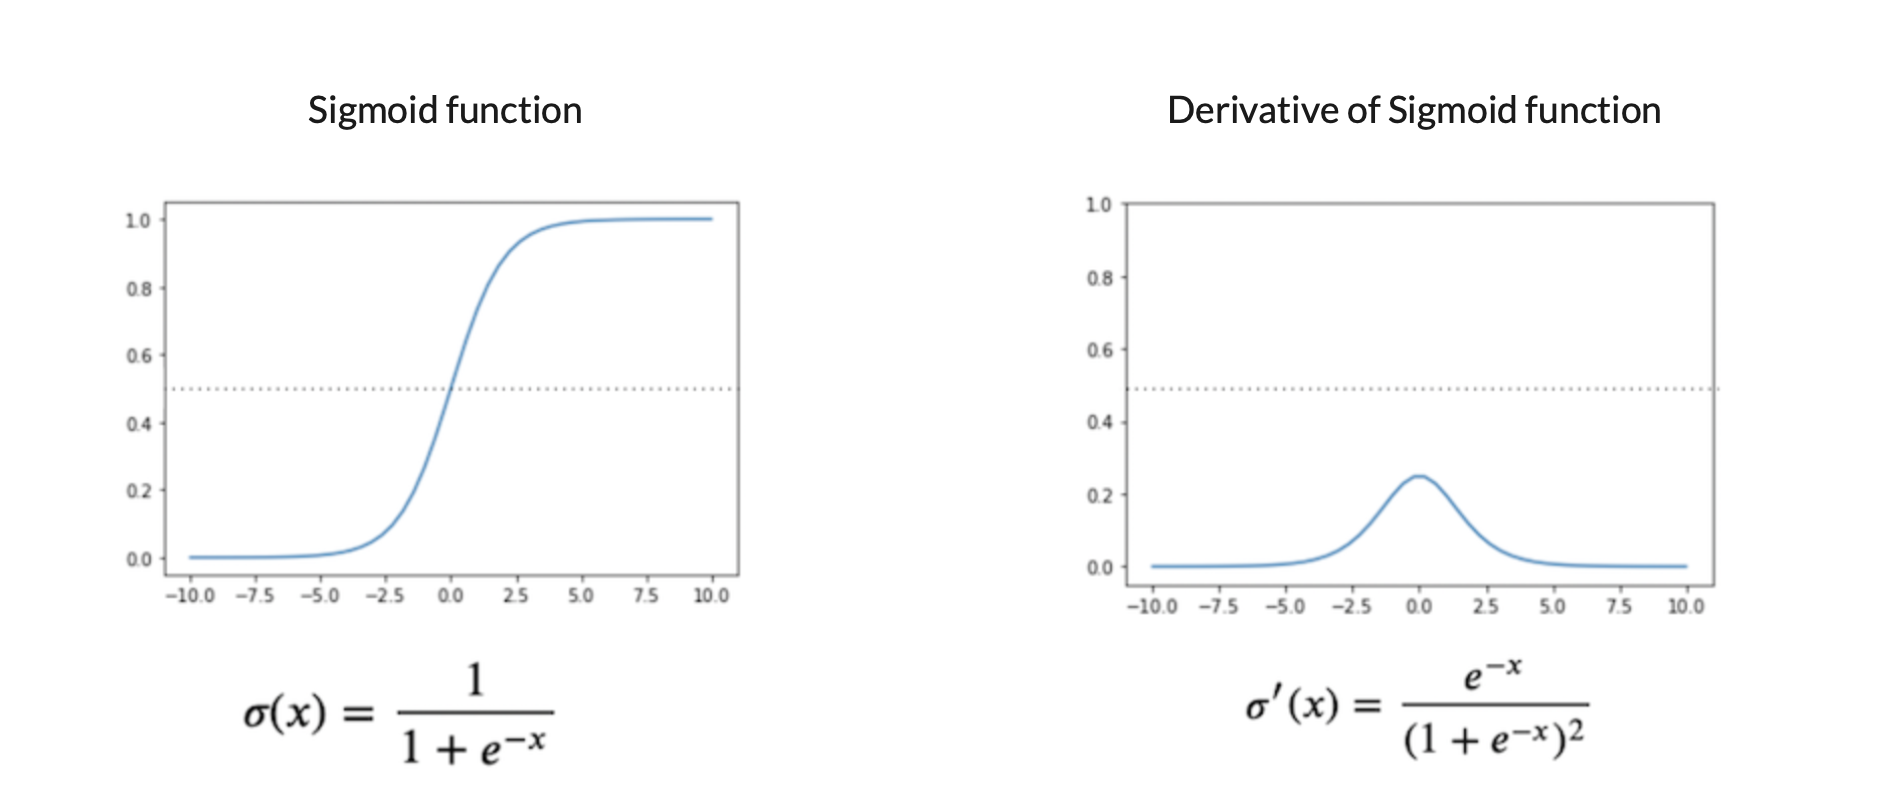

This happened because we built our neural network based on Logistic Regression models. However, such a choice of activation function is not the best for hidden layers of a neural network. This is due to some properties that the derivative of sigmoid function has. As we will see later, derivatives play a key role in training of neural networks. We'll get back to the problems of sigmoid activation function later, when we understand the principle of neural networks training.



#### Question #2

We see that the derivative of a Sigmoid function is a quite complicated function. As we will see further, the training of a neural network is based on calculations of derivatives of all of network's components. So calculation of Sigmoid derivative in a current form is complicated and will take time. Fortunately, Sigmoid derivative can be expressed in a more neat form through sigmoid function itself. Could you derive this form?

#### Answer

$$'\sigma(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}} = $$
$$= \frac{1}{1+e^{-x}}\frac{1 + e^{-x} - 1}{1+e^{-x}} = \frac{1}{1+e^{-x}}\left(1 - \frac{1}{1+e^{-x}}\right) = \sigma(x)(1 - \sigma(x))$$

But what is used instead of sigmoid? There are many types of activation functions that are used in different neural networks. The most popular of them are the following:

#### Tanh

The tangential activation function has replaced the sigmoid and has long been used as a universal activation function for hidden layers of neural networks. But it also has strong disadvantages, and many of them are of the same nature as those of the sigmoid function. Again, you'll have a chance to read more about it after we've got familar with neural network training procedure.

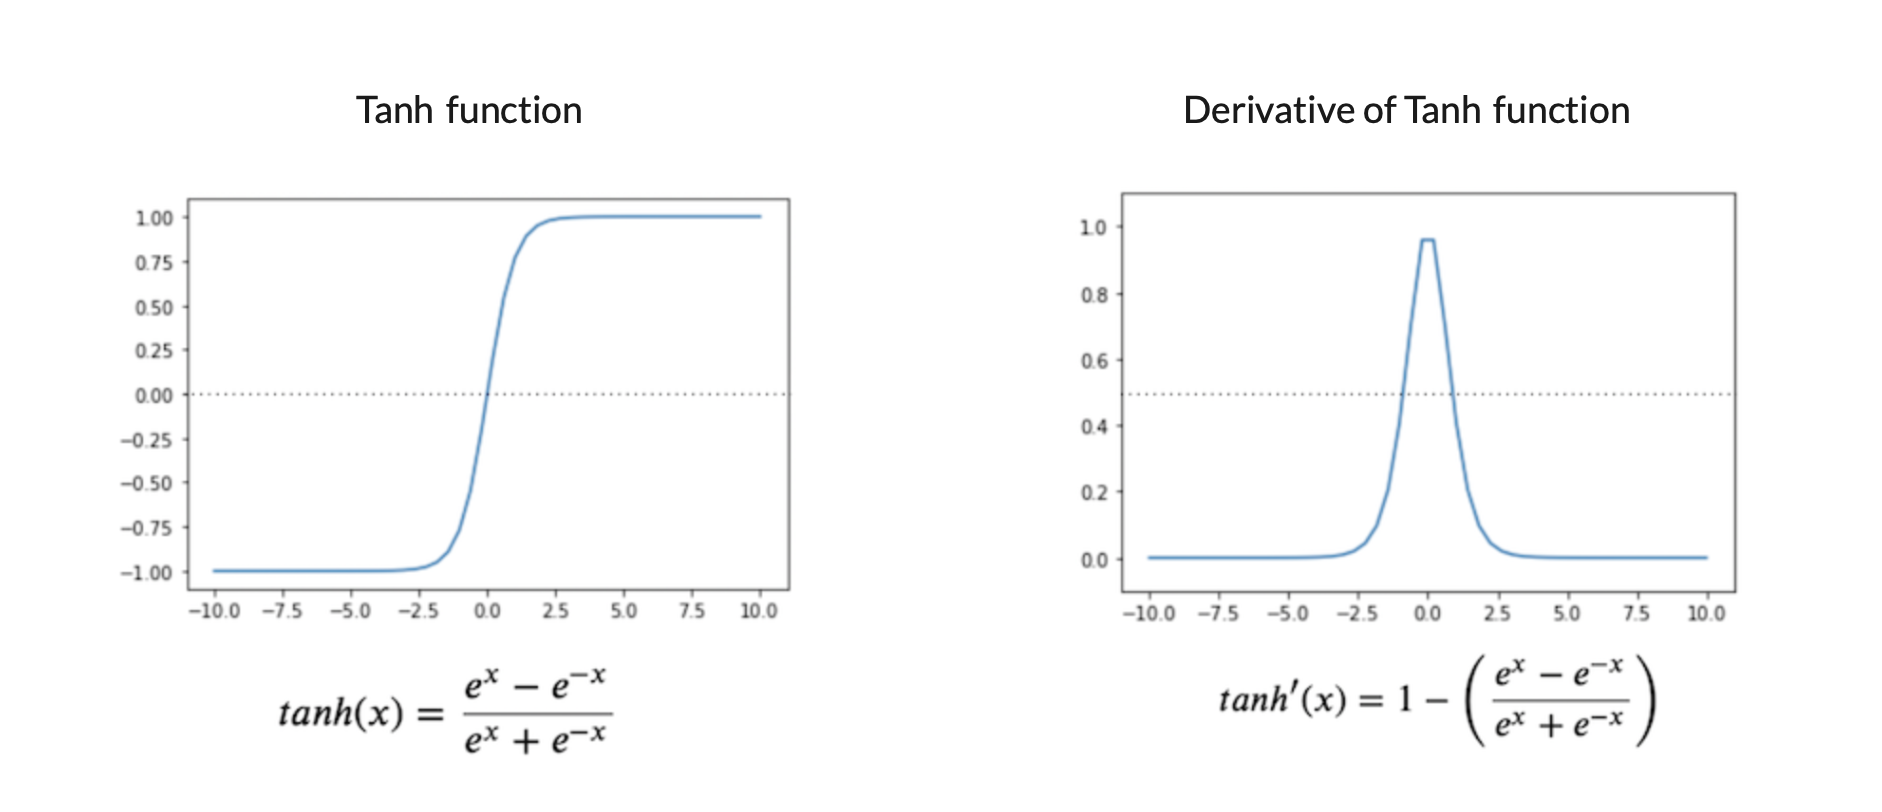

#### Question #3

We see that the formula of Tanh looks similar to that of Sigmoid. Actually, Tanh function can be expressed through Sigmoid function. Can you derive that expression?

#### Answer

$$tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} = \frac{2e^{x} - (e^{x}+e^{-x})}{e^{x}+e^{-x}} = \frac{2e^{x}}{e^{x}+e^{-x}} - 1 = \frac{2}{1+\frac{e^{-x}}{e^{x}}} - 1 = \frac{2}{1+e^{-2x}} - 1 = 2\sigma(2x)-1$$

#### ReLU

ReLU is the activation function that can be called "universal" nowadays. It works well in most cases. It does not have the same drawbacks as sigmoid and tanh, and it and its derivative is much easier to calculate.

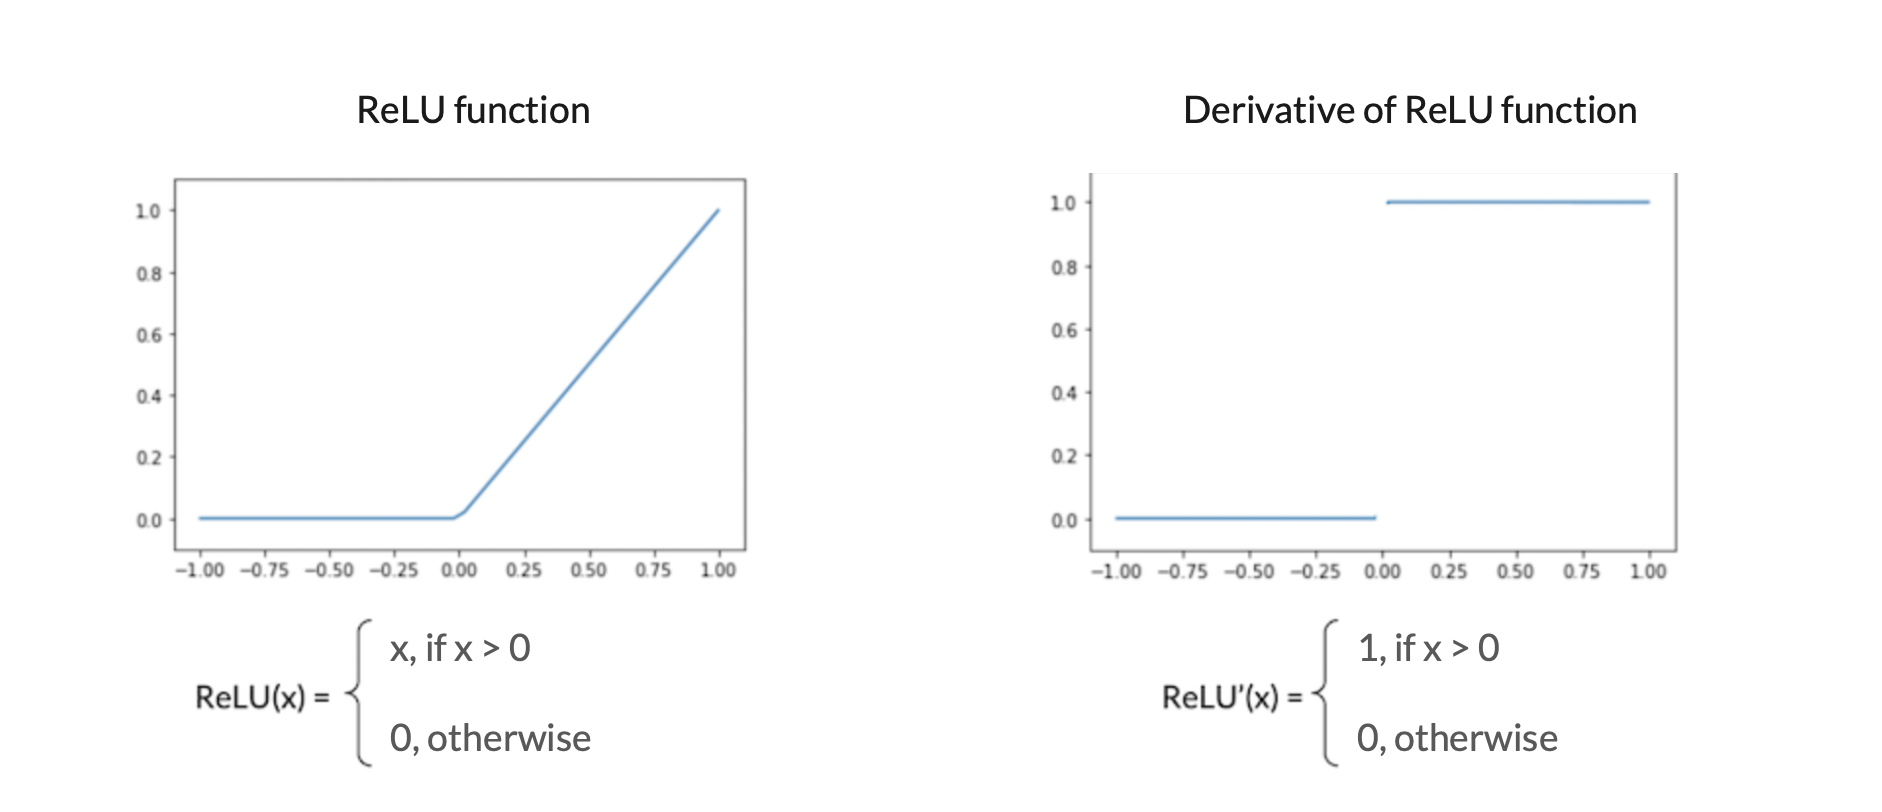

ReLU is an activation function that can be used by default in the hidden layers of neural networks. It works well in most of the cases.

#### Other activation functions

Besides Sigmoid, Tanh and ReLU, there are other activation functions. For example, Leaky ReLu, ELU (which are modifications of ReLU), Swish, and others. Many of them are good for solving certain narrow problems.

### Solving XOR-problem сusing fully-connected neural network.

Let's now try to solve the XOR problem using a fully connected neural network. We will build a network which has one hidden layer with three neurons with the ReLU activation function.

$$\widehat{y} = \sigma(W_2^TS + b_2)$$

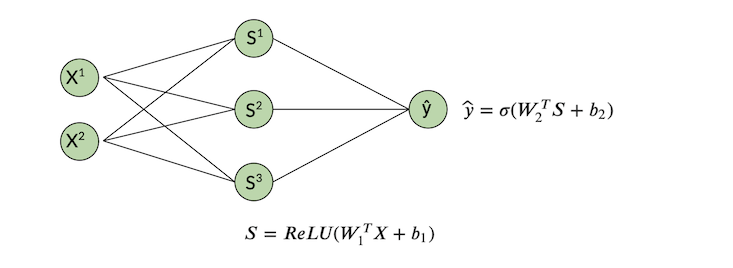

For now for simplicity we'll use neural network class from SKLearn. But don't worry, in the next lesson we'll start building neural nets in PyTorch — a most popu;ar framework for neural networks nowadays.

In [13]:
from sklearn.neural_network import MLPClassifier

# define neural network with 3 hidden neurons and relu activation function
# it's a classifier, so there'll be sigmoid activation function on the last layer
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', solver='sgd', max_iter=5000, random_state=42)
# fitting network for our XOR data
mlp.fit(X_xor, Y_xor)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=5000, random_state=42,
              solver='sgd')

Now let's visualize a decision boundary of our trained network:

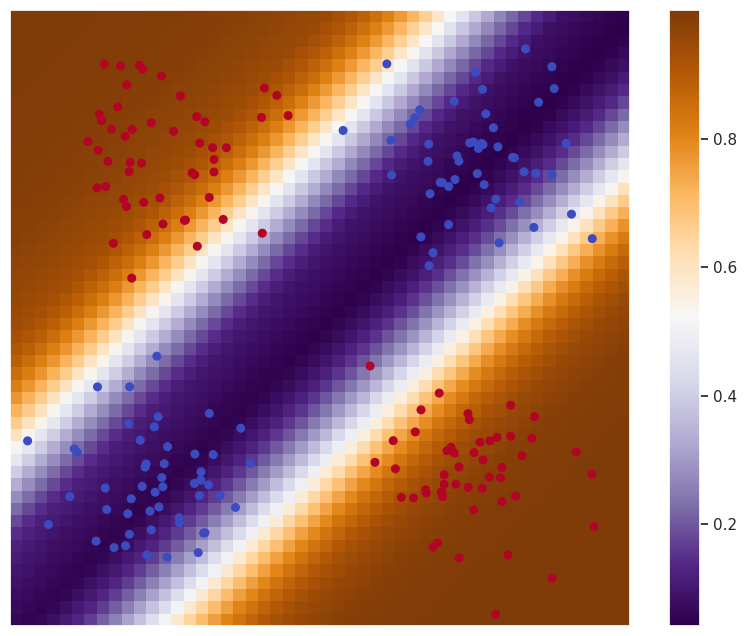

In [14]:
plt.figure(figsize=(10,8))
plot_boundary(mlp, X_xor, Y_xor)

We see that our network's doing perfect with XOR problem!

Now we can also look at the weights that our neural network has adjusted during training:

In [15]:
mlp.coefs_, mlp.intercepts_

([array([[-0.64097394,  0.32079916,  1.01793402],
         [ 0.66341768, -0.30494279, -1.01460174]]),
  array([[ 0.9258544 ],
         [-1.61913219],
         [ 1.60365743]])],
 [array([-0.90037302,  1.80558689, -0.30780318]), array([0.06694087])])

mlp.coefs_ contains two matrices of weights $W_1$ and $W_2$, mlp.intercepts_ contains two vectors of $b_1$ and $b_2$.

Now you can play with neural network parameters and see how they influence performance.

### Solving regression task using neural network

So far we've been talking about the binary classification problem. And we built a neural network based on Logistic Regression - a model, which is designed precisely for the binary classification problem. But, of course, neural networks can solve other kinds of problems.

Two most typical kinds of problems are:
- regression;
- multi-class classification.

Adapt a fully connected neural network for a regression task is simple — you just need to replace the Logistic Regression in the last layer with a Linear Regression model. That is, basically, removing the activation function from the neuron of the last layer. Note that you still need to keep the activation functions in all hidden layers of the network!

We will talk about the problem of multi-class classification in the next lesson.




### Few words regarding neural network training

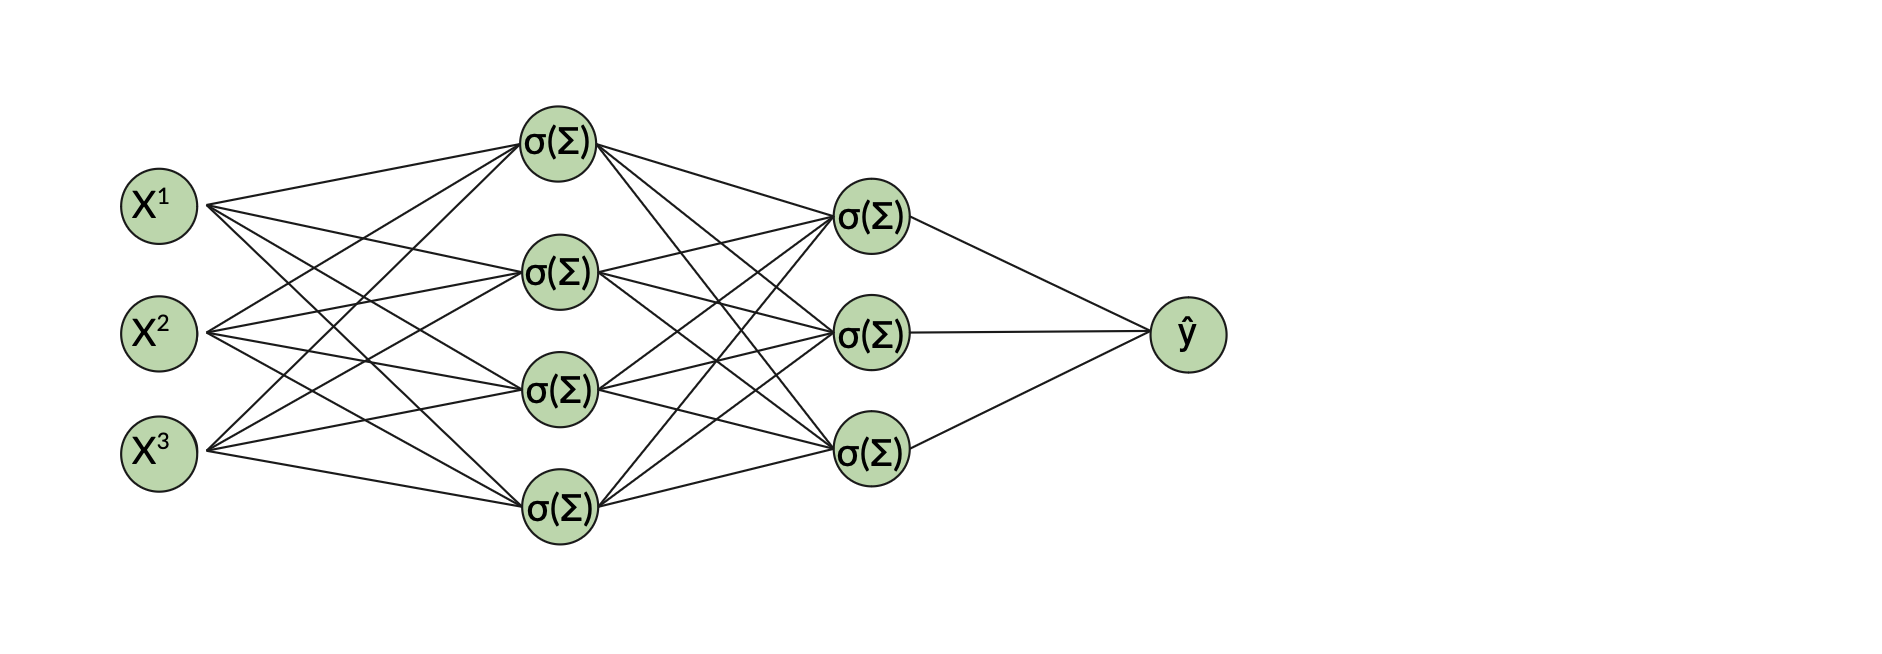

$$\widehat{y} = \sigma(W_3 \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

As we've briefly mentioned above, training a neural network consists of finding the optimal values ​​of all the network parameters for a given task. Basically, the idea is the same as in training of Logistic Regression model, but we now have more parameters to adjust.

Let's elaborate: let's say we have a dataset. Let's take the dataset we considered above.

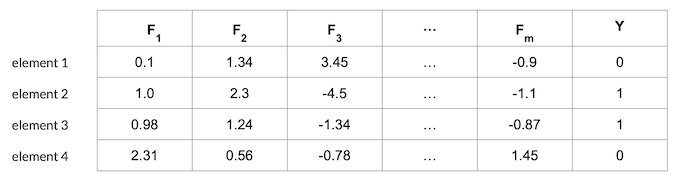

And let's say we've chosen the loss function $L$ that we want to minimize based on our data. It might be the same loss funtion that is used when training Logistic Regression model.

Then the task of training the network is to find such values of all the network parameters $\{W_i, b_i\}$, that the average value of the loss function on the elements of the training dataset is minimal:

$$\frac{\sum_{i=1}^n L(y_i, \widehat{y}_i)}{n} \to min$$

Here $n$ is a number od elements in the training data, $y_i$ is a true value of the target variable for the $i^{th}$ element,  $\widehat{y}_i$ is a predictions of a model for the $i^{th}$ element.

The neural network weights are trained using the gradient descent algorithm (just as in Logistic Regression). We will go into more details on this algorithm for training neural networks in the following lesson.

## Different types of neural networks

In this lesson we got acquainted with the structure of a fully connected neural network. This is a classic neural structure, with which the history of deep learning began. But in recent years, other neural network architectures have been proposed that are well suited for solving various types of problems. We will get acquainted with some of them in the following lessons of this course. It is worth noting, however, that all other neural network architectures are based on the same ideas as fully connected neural networks, and most of them have a fully-connected part in it.

Here are some of the popular types of neural networks:

1) **Fully-connected neural networks**. This is what we've built in this class;

2) **Convolutional neural networks**. This architecture was designed to efficiently process images, though it can be used for other types of data as well;

3) **Recurrent neural networks**. This architecture was designed to work more efficiently with data represented as sequences.;

4) **Attention-based Transformers**. Originally proposed for the task of machine translation, the idea of ​​this architecture has proven to be very effective in tasks ranging from image processing to text and sound. It is one of the basic and mostly used types of networks nowadays;

5) **Graph neural networks**. This type of neural networks works well when working with data that has a graph nature. For example, social network graphs/molecules of substances, etc.

# Additional Materials

## Useful links



- "[Make Your Own Neural Network](https://www.amazon.co.uk/Make-Your-Own-Neural-Network/dp/1530826608)"  — a book in which the first few chapters perfectly explain the structure of a fully connected neural network and the principle of its training.
- - [A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.85255&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) — here you can build simple fully-connected neural networks using UI, train them on toy tasks and visualize decision boundaries

- Articles on Kernel Trick:
    - https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f
    - https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d
    - https://www.columbia.edu/~mh2078/MachineLearningORFE/SVMs_MasterSlides.pdf
    - https://indico.cern.ch/event/439520/contributions/1941519/attachments/1147353/1645460/Kernel_trick._Deep_learning.pdf
    - https://www.youtube.com/watch?v=Q7vT0--5VII
- Some intuition on how ReLU works and how it influences the decision boundary of a layers
    - [First part](https://medium.com/analytics-vidhya/how-relu-works-f317a947bdc6)
    - [Second part](https://medium.com/analytics-vidhya/how-does-relu-activation-work-part-2-8bb4feeb3b42)
